In [ ]:
import numpy as np
import pandas as pd


In [ ]:
# read file
df=pd.read_csv('Education.csv')

In [ ]:
# display
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,T,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [ ]:
#deal with missing values
#Topic- replace with most common
#Relation- remove the rows
#GradeID- remove the rows
#Raisedhands- replace with average


In [ ]:
# -->Topic:replace with most common
#=>replace with maximum count

#please note that for mode any datatype is allowed



In [ ]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                 object
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [ ]:
# Replace all ? with np.NaN

df.replace('?', np.NaN,inplace=True)


In [ ]:
#Find maximum count of  entries in Topic column
df['Topic'].mode()

0    IT
dtype: object

In [ ]:
df['Topic'].fillna('IT' , inplace=True)


In [ ]:
#--->Relation- remove the rows

df.dropna(subset=["Relation"], axis=0, inplace=True)


In [ ]:
#---->GradeID- remove the rows


df.dropna(subset=["GradeID"], axis=0, inplace=True)




In [ ]:
# Raisedhands- replace with average

#1-Check Datatype
#2-Convert to float
#3-Find mean
#2-Replace np.NaN with mean

In [ ]:
df['raisedhands'].dtypes

dtype('O')

In [ ]:
df['raisedhands'].replace('?', np.NaN,inplace=True)

In [ ]:
#convert to float
df['raisedhands'] = df['raisedhands'].astype(float)

In [ ]:
df["raisedhands"].describe()

count    468.000000
mean      46.831197
std       30.899425
min        0.000000
25%       16.000000
50%       50.000000
75%       75.000000
max      100.000000
Name: raisedhands, dtype: float64

In [ ]:
df['raisedhands'].replace(np.nan,df['raisedhands'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [ ]:
# Hence We have handeled all null values

In [ ]:
#DETECT AND  REMOVE OUTLAYERS USING BOX PLOT

# YOUTUBE REFRENCE:

https://youtu.be/cVJnTs1PP-w

https://youtu.be/U1owDs-NrrI


In [ ]:
import seaborn as sns

In [ ]:
dat=pd.read_csv('Education.csv')

In [ ]:
#BOX PLOT USES ONLY NUMERIC DATAVALUES
# HENCE CONVERT F TO 1
#AND  S TO 2

#OF column with name semester

#then convert data type to integer

In [ ]:
df["Semester"].replace('F','1',inplace=True)
df["Semester"].replace('S','2',inplace=True)
df["Semester"].replace('T','3',inplace=True)

In [ ]:
# Convert to integer


df['Semester'] = df['Semester'].astype(int)

<AxesSubplot:ylabel='Semester'>

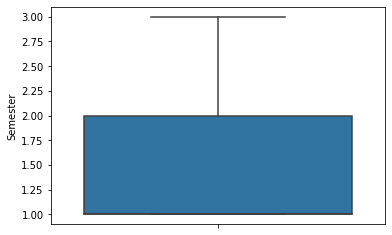

In [ ]:
#creating boxplot on y axis
sns.boxplot(y = 'Semester', data = df)

<AxesSubplot:xlabel='Semester'>

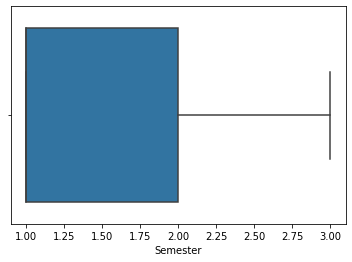

In [ ]:
#creating boxplot on x axis
sns.boxplot(x = 'Semester', data = df)

In [ ]:
# Here value crossing 2 seems to be outlayer
#hence create a new file in  which
#value going beyond 3 will be removed

In [ ]:
newdf=df[df.Semester<2.25]

<AxesSubplot:xlabel='Semester'>

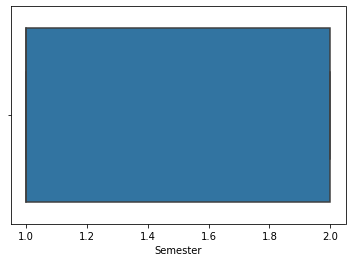

In [ ]:
# You can see here outlayer is removed

sns.boxplot(x = 'Semester', data = newdf)

In [ ]:
# Drop  Column
#ParentansweringSurvey- mismatched-remove the column


newdf.drop(['ParentAnsweringSurvey'], axis=1)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,1,Father,15.0,16,2,20,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,1,Father,20.0,20,3,25,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,1,Father,10.0,7,0,30,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,1,Father,30.0,25,5,35,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,1,Father,40.0,50,12,50,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,1,Father,2.0,7,4,8,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,1,Father,50.0,77,14,28,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,2,Father,55.0,74,25,29,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,1,Father,30.0,17,14,57,Bad,Above-7,L


In [ ]:

#Normalization-
#Raisedhands
#VisitedResources

newdf.replace(newdf['raisedhands'], newdf['raisedhands']/newdf['raisedhands'].max())
newdf.replace(newdf['VisITedResources'], newdf['VisITedResources']/newdf['VisITedResources'].max())



,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,1,Father,15.0,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,1,Father,20.0,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,1,Father,10.0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,1,Father,30.0,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,1,Father,40.0,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,1,Father,2.0,7,4,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,1,Father,50.0,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,2,Father,55.0,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,1,Father,30.0,17,14,57,No,Bad,Above-7,L


In [ ]:
#Transformation
#GradeID- Convert grades to 1-10
#StudentAbsentDays - convert to 1-10


In [ ]:
# consider grades
#count the values
newdf['GradeID'].value_counts()

NameError: ignored

In [ ]:
newdf['GradeID'].replace("2G-0",2,inplace=True)
newdf['GradeID'].replace("G-08",8,inplace=True)
newdf['GradeID'].replace("G-07",7,inplace=True)
newdf['GradeID'].replace("G-04",4,inplace=True)
newdf['GradeID'].replace("G-06",6,inplace=True)
newdf['GradeID'].replace("G-11",11,inplace=True)
newdf['GradeID'].replace("G-12",12,inplace=True)
newdf['GradeID'].replace("G-09",9,inplace=True)
newdf['GradeID'].replace("G-10",10,inplace=True)
newdf['GradeID'].replace("G-05",5,inplace=True)

In [ ]:
 # similarly do this for StudentAbsentDays

 newdf['StudentAbsenceDays'].value_counts()

Under-7    282
Above-7    186
Name: StudentAbsenceDays, dtype: int64

In [ ]:
newdf['StudentAbsenceDays'].replace("Under-7",6)
newdf['StudentAbsenceDays'].replace("Above-7",8)

0      Under-7
1      Under-7
2            8
3            8
4            8
        ...   
474          8
476    Under-7
477    Under-7
478          8
479          8
Name: StudentAbsenceDays, Length: 468, dtype: object

In [ ]:
# Binning

reference:
https://youtu.be/mDgL3Pp1IMw

In [ ]:
#Define Bins:
bins=[0,25,50,75,100]
groupnaames=['lessDiscussion','AvgDiscussion','GoodDiscussion','HighDiscussion']

#Create new column with name DissSummary and store result there

newdf['DissSummary']=pd.cut(df['Discussion'],bins,labels=groupnaames)

<ipython-input-108-c6fbf1b90cd9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['DissSummary']=pd.cut(df['Discussion'],bins,labels=groupnaames)


In [ ]:
newdf

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,DissSummary
0,M,KW,KuwaIT,lowerlevel,4,A,IT,1,Father,15.0,16,2,20,Yes,Good,Under-7,M,lessDiscussion
1,M,KW,KuwaIT,lowerlevel,4,A,IT,1,Father,20.0,20,3,25,Yes,Good,Under-7,M,lessDiscussion
2,M,KW,KuwaIT,lowerlevel,4,A,IT,1,Father,10.0,7,0,30,No,Bad,Above-7,L,AvgDiscussion
3,M,KW,KuwaIT,lowerlevel,4,A,IT,1,Father,30.0,25,5,35,No,Bad,Above-7,L,AvgDiscussion
4,M,KW,KuwaIT,lowerlevel,4,A,IT,1,Father,40.0,50,12,50,No,Bad,Above-7,M,AvgDiscussion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,F,Jordan,Jordan,MiddleSchool,8,A,Chemistry,1,Father,2.0,7,4,8,No,Bad,Above-7,L,lessDiscussion
476,F,Jordan,Jordan,MiddleSchool,8,A,Geology,1,Father,50.0,77,14,28,No,Bad,Under-7,M,AvgDiscussion
477,F,Jordan,Jordan,MiddleSchool,8,A,Geology,2,Father,55.0,74,25,29,No,Bad,Under-7,M,AvgDiscussion
478,F,Jordan,Jordan,MiddleSchool,8,A,History,1,Father,30.0,17,14,57,No,Bad,Above-7,L,GoodDiscussion


In [ ]:
#Save file as csv
newdf.to_csv('Education2.csv')